In [1]:
#client_secret_938958032418-gmbosjv2dh0tkc2e4g859rkn33i6r4n7.apps.googleusercontent.com.json
#The json file is saved in Jerry's Jupyter home 
import pandas as pd
import pygsheets as pyg
import httplib2
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
import datetime
%matplotlib inline
sns.set()

In [220]:
#authorize to access my googlesheet
# pyg = pyg.authorize()
# pyg = pyg.authorize(client_secret='client_secret_938958032418-gmbosjv2dh0tkc2e4g859rkn33i6r4n7.apps.googleusercontent.com.json', retries=10, http_client=httplib2.Http(timeout=100))

In [221]:
#pyg = pyg.authorize(outh_file='client_secret_938958032418-gmbosjv2dh0tkc2e4g859rkn33i6r4n7.apps.googleusercontent.com.json', retries=10, http_client=httplib2.Http(timeout=100))

In [35]:
#googlesheet to python df function
#pyg = pyg.authorize(outh_file='client_secret_938958032418-gmbosjv2dh0tkc2e4g859rkn33i6r4n7.apps.googleusercontent.com.json', retries=10, http_client=httplib2.Http(timeout=100))

#To load googlesheet data into Jupyter
# def sheet_to_df(doc_id, sheet_name, has_header=True, start=None, end=None):
#     doc=pyg.open_by_key(doc_id)
#     sheet=doc.worksheet_by_title(sheet_name)
#     df=sheet.get_as_df(empty_value=np.nan, has_header=has_header, start=start, end=end)
#     return df

## Download the data from google sheet

In [222]:
# df_campaign = sheet_to_df('1WfeqtmAzVuD2dLNrrmvxG_cqQH0R5FyO-AUSf8GqMHM/edit#gid=1763512150','sandbox_campaign_recipient')
# df_user = sheet_to_df('1WfeqtmAzVuD2dLNrrmvxG_cqQH0R5FyO-AUSf8GqMHM/edit#gid=1763512150','sanbox_users_redux')
# df_campaign.head(10)

## Data quality check and exploratory data analysis

In [183]:
df_campaign = pd.read_csv('campaign_recipients_redux.csv', engine='python')
df_user = pd.read_csv('users_redux.csv', engine='python')

In [184]:
df_campaign.head(5)

,campaign_description,campaign_id,campaign_variation,day,profile_id
0,this was the first campaign,email_campaign0,A,2015-07-13 00:00:00,9374a964c2112758
1,new headers and subject lines,email_campaign1,B,2015-07-27 00:00:00,15a76a51a5aa89c6
2,header and subject from segment B previous cam...,email_campaign2,B,2015-08-10 00:00:00,553726155183391c
3,this was the first campaign,email_campaign0,A,2015-07-13 00:00:00,b0205b2bc282629a
4,new headers and subject lines,email_campaign1,C,2015-07-27 00:00:00,6108a297b98a6ac4


In [186]:
df_user.head(3)

,day,profile_id
0,2015-07-02 00:00:00,cb0a2376cc2123b1
1,2015-07-15 00:00:00,9a162222b6369695
2,2015-12-13 00:00:00,b6a727b02599a307


In [187]:
df_campaign['date_campaign'] = pd.to_datetime(df_campaign['day'])
print(df_campaign.isnull().any().any())    ## df_campaign doesn't have null value in any columns
print(df_user.isnull().any().any())     ## df_user has null value in some columns

df_campaign.info()
df_user.info()

False
True
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 6 columns):
campaign_description    45000 non-null object
campaign_id             45000 non-null object
campaign_variation      45000 non-null object
day                     45000 non-null object
profile_id              45000 non-null object
date_campaign           45000 non-null datetime64[ns]
dtypes: datetime64[ns](1), object(5)
memory usage: 2.1+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46159 entries, 0 to 46158
Data columns (total 2 columns):
day           46159 non-null object
profile_id    46103 non-null object
dtypes: object(2)
memory usage: 721.3+ KB


## Clean df_campaign DataFrame

In [188]:
# create unique campaign identifier
df_campaign['unique_identifier'] = df_campaign['campaign_description'].map(str)+'_'+df_campaign['campaign_id'].map(str)+'_'+df_campaign['campaign_variation'].map(str)

In [189]:
df_campaign['unique_identifier'].unique()

array(['this was the first campaign_email_campaign0_A',
       'new headers and subject lines_email_campaign1_B',
       'header and subject from segment B previous campaign_email_campaign2_B',
       'new headers and subject lines_email_campaign1_C'], dtype=object)

In [191]:
df_campaign.sort_values(by=['profile_id', 'date_campaign'])

,campaign_description,campaign_id,campaign_variation,day,profile_id,date_campaign,unique_identifier
14864,header and subject from segment B previous cam...,email_campaign2,B,2015-08-10 00:00:00,000168c210b4097b,2015-08-10,header and subject from segment B previous cam...
20825,header and subject from segment B previous cam...,email_campaign2,B,2015-08-10 00:00:00,000168c210b4097b,2015-08-10,header and subject from segment B previous cam...
42338,header and subject from segment B previous cam...,email_campaign2,B,2015-08-10 00:00:00,000168c210b4097b,2015-08-10,header and subject from segment B previous cam...
1097,header and subject from segment B previous cam...,email_campaign2,B,2015-08-10 00:00:00,000228c5b7475acc,2015-08-10,header and subject from segment B previous cam...
29840,header and subject from segment B previous cam...,email_campaign2,B,2015-08-10 00:00:00,000228c5b7475acc,2015-08-10,header and subject from segment B previous cam...
36365,header and subject from segment B previous cam...,email_campaign2,B,2015-08-10 00:00:00,000228c5b7475acc,2015-08-10,header and subject from segment B previous cam...
23153,header and subject from segment B previous cam...,email_campaign2,B,2015-08-10 00:00:00,0004227a9c784661,2015-08-10,header and subject from segment B previous cam...
35309,header and subject from segment B previous cam...,email_campaign2,B,2015-08-10 00:00:00,0004227a9c784661,2015-08-10,header and subject from segment B previous cam...
40646,header and subject from segment B previous cam...,email_campaign2,B,2015-08-10 00:00:00,0004227a9c784661,2015-08-10,header and subject from segment B previous cam...
23442,this was the first campaign,email_campaign0,A,2015-07-13 00:00:00,00075b0368caac87,2015-07-13,this was the first campaign_email_campaign0_A


In [193]:
## Drop duplicate entries in df_campaign
df_campaign.drop_duplicates(inplace=True)
df_campaign.shape    

(15000, 7)

In [194]:
df_campaign.pivot_table(index = 'date_campaign', columns='unique_identifier', values='profile_id', aggfunc='nunique')

unique_identifier,header and subject from segment B previous campaign_email_campaign2_B,new headers and subject lines_email_campaign1_B,new headers and subject lines_email_campaign1_C,this was the first campaign_email_campaign0_A
date_campaign,,,,
2015-07-13,NaN,NaN,NaN,5000.0
2015-07-27,NaN,2500.0,2500.0,NaN
2015-08-10,5000.0,NaN,NaN,NaN


## Clean up df_user DataFrame

df_user is a dataframe of user activity log based on profile_id and date

In [195]:
### profile_id has null values
df_user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46159 entries, 0 to 46158
Data columns (total 2 columns):
day           46159 non-null object
profile_id    46103 non-null object
dtypes: object(2)
memory usage: 721.3+ KB


In [196]:
## test account from Elsevier internal test team
# We need to remove yaymendeley12345 profile_id as it's a test account
df_user['profile_id'].value_counts().head(10)

yaymendeley12345    1712
22a302304263c504      78
a2367b25c42c95b4      78
912c57165b6a44b2      70
9c8729214bcbccba      70
401c31c12658bb22      68
277961843562ba76      68
8568acb67a2a7534      66
18645bb1bb56741c      66
21b050577019794b      65
Name: profile_id, dtype: int64

In [197]:
## Remove yaymendeley12345 and Null values in profile_id
## 1712 profile_id = yaymendeley12345
## 56 profile_id = null 
df_user = df_user[(df_user['profile_id']!='yaymendeley12345') & (~df_user['profile_id'].isnull())]
df_user.shape

(44391, 2)

In [198]:
## add usage date column and date of week column
df_user['date_usage'] = pd.to_datetime(df_user['day'])
df_user['day of week'] = df_user['date_usage'].dt.dayofweek
df_user.info()
df_user.head(5)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44391 entries, 0 to 46158
Data columns (total 4 columns):
day            44391 non-null object
profile_id     44391 non-null object
date_usage     44391 non-null datetime64[ns]
day of week    44391 non-null int64
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 1.7+ MB


,day,profile_id,date_usage,day of week
0,2015-07-02 00:00:00,cb0a2376cc2123b1,2015-07-02,3
1,2015-07-15 00:00:00,9a162222b6369695,2015-07-15,2
2,2015-12-13 00:00:00,b6a727b02599a307,2015-12-13,6
3,2015-07-27 00:00:00,6b949334c76a052b,2015-07-27,0
4,2015-10-05 00:00:00,4304392080cb06c2,2015-10-05,0


In [199]:
print(df_user.columns)

df_user['profile_id_df_user'] = df_user['profile_id']
df_user.drop(['profile_id', 'day'], axis=1, inplace=True)

Index(['day', 'profile_id', 'date_usage', 'day of week'], dtype='object')


In [200]:
## Add Monday week to group by cohorts
import datetime
df_user['usage_monday_week'] = df_user['date_usage'].apply(lambda x: x - datetime.timedelta(days = x.weekday()))

In [201]:
df_user.head(5)

,date_usage,day of week,profile_id_df_user,usage_monday_week
0,2015-07-02,3,cb0a2376cc2123b1,2015-06-29
1,2015-07-15,2,9a162222b6369695,2015-07-13
2,2015-12-13,6,b6a727b02599a307,2015-12-07
3,2015-07-27,0,6b949334c76a052b,2015-07-27
4,2015-10-05,0,4304392080cb06c2,2015-10-05


## Now the two dataframes are ready for some EDA....

In [202]:
## weekly seasonality pattern
## 4 campaigns + organic
## I need to know the user base (outside the current new product)
## weekly user count Chi Square
## spike -> inactive (churn)
## the effect gradually die down - Airbnb experimentation 
df_user.head(5)

,date_usage,day of week,profile_id_df_user,usage_monday_week
0,2015-07-02,3,cb0a2376cc2123b1,2015-06-29
1,2015-07-15,2,9a162222b6369695,2015-07-13
2,2015-12-13,6,b6a727b02599a307,2015-12-07
3,2015-07-27,0,6b949334c76a052b,2015-07-27
4,2015-10-05,0,4304392080cb06c2,2015-10-05


Text(0.5,1,'Daily Unique Visitors ')

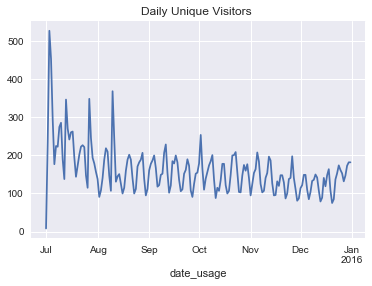

In [204]:
df_user.groupby('date_usage')['profile_id_df_user'].nunique().plot()
plt.title("Daily Unique Visitors ")

In [20]:
df_user.groupby('usage_monday_week')['profile_id_df_user'].count()

usage_monday_week
2015-06-29    3485
2015-07-06    1514
2015-07-13    3528
2015-07-20    1311
2015-07-27    4042
2015-08-03    1174
2015-08-10    3470
2015-08-17    1318
2015-08-24    1352
2015-08-31    1519
2015-09-07    1435
2015-09-14    1379
2015-09-21    1248
2015-09-28    1428
2015-10-05    1426
2015-10-12    1232
2015-10-19    1501
2015-10-26    1272
2015-11-02    1461
2015-11-09    1226
2015-11-16    1168
2015-11-23    1191
2015-11-30    1101
2015-12-07    1247
2015-12-14    1139
2015-12-21    1357
2015-12-28     867
Name: profile_id_df_user, dtype: int64

In [206]:
# # unique profile_id per day here....assume that the same profile_id login several times per day
# df_user.groupby('date_usage')['profile_id'].count().plot()
# plt.title('session count per day')
# df_user.groupby('date_usage')['profile_id'].count().head(50)

In [205]:
# # unique profile_id per day here....assume that the same profile_id login several times per day
# df_user.groupby('date_usage')['profile_id'].nunique().plot()
# plt.title('unique_user per day')
# df_user.groupby('date_usage')['profile_id'].nunique().sort_values(ascending=False)

## What is the impact of each email campaign? 

In [207]:
df_final = pd.merge(left=df_user, right=df_campaign, how='left', left_on='profile_id_df_user', right_on='profile_id')

In [208]:
df_final['unique_identifier'].fillna(value='no campaign', inplace=True)
df_final.head(5)
print(df_final.shape)

(44391, 11)


In [209]:
#########################################################################################
###### Filter out the users who were already active prior to the campaign  ##############
#########################################################################################
print(df_final.shape)

bad_id_list = []
for c in df_final[df_final['date_usage'] < df_final['date_campaign']]['profile_id_df_user']:
    bad_id_list.append(c)
print(len(bad_id_list))
df_final = df_final[~df_final['profile_id_df_user'].isin(bad_id_list)]
df_final.shape

(44391, 11)
126


(43693, 11)

In [210]:
df_final.groupby('unique_identifier')['profile_id_df_user'].nunique()

unique_identifier
header and subject from segment B previous campaign_email_campaign2_B     350
new headers and subject lines_email_campaign1_B                           233
new headers and subject lines_email_campaign1_C                           160
no campaign                                                              8228
this was the first campaign_email_campaign0_A                             244
Name: profile_id_df_user, dtype: int64

In [26]:
# active before email campaign? 
# there are users who are active users before the email...
#df_final[df_final['date_y'].dt.date > df_final['date_x'].dt.date].shape
# the good news it's only 126 entries
# df_final.info()

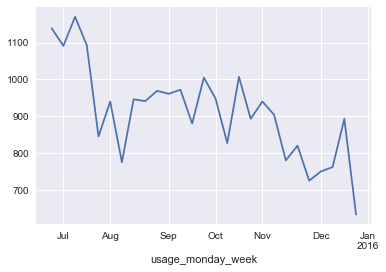

In [28]:
df_pivot = df_final.pivot_table(index='usage_monday_week', columns='unique_identifier', aggfunc='nunique', values='profile_id_df_user')
df_pivot['no campaign'].plot()    # is there a weekly pattern? weekday 

In [219]:
# weekday effect? 
# monday = 0, sunday =6
df_dayofweek = df_final.pivot_table(index='day of week', columns='unique_identifer', aggfunc='nunique', values='profile_id_df_user')
df_dayofweek.head(10)

unique_identifer,header and subject from segment B previous campaign_email_campaign2_B,new headers and subject lines_email_campaign1_B,new headers and subject lines_email_campaign1_C,no campaign,this was the first campaign_email_campaign0_A
day of week,,,,,
0,255,194,103,2452,225
1,119,64,51,3114,124
2,53,47,36,3197,99
3,39,45,41,3572,136
4,45,41,36,3615,82
5,32,38,59,2892,78
6,31,23,30,2250,64


In [211]:
# df_pivot = df_final.pivot_table(index='date_x', columns='unique_identifer', aggfunc='count', values='profile_id_df_user')
# df_pivot.fillna(value=0, inplace=True)    # is there a weekly pattern? weekday 
# df_pivot.plot()


In [225]:
df_pivot.tail(60)

unique_identifer,header and subject from segment B previous campaign_email_campaign2_B,new headers and subject lines_email_campaign1_B,new headers and subject lines_email_campaign1_C,no campaign,this was the first campaign_email_campaign0_A
date_x,,,,,
2015-11-02,25.0,1.0,10.0,116.0,19.0
2015-11-03,30.0,10.0,30.0,141.0,31.0
2015-11-04,37.0,11.0,10.0,155.0,11.0
2015-11-05,15.0,11.0,0.0,197.0,20.0
2015-11-06,3.0,5.0,27.0,171.0,23.0
2015-11-07,23.0,2.0,30.0,110.0,21.0
2015-11-08,20.0,21.0,20.0,90.0,15.0
2015-11-09,0.0,11.0,1.0,102.0,9.0
2015-11-10,10.0,2.0,27.0,132.0,15.0


In [180]:
#plt.figure(figsize=(100,100))
df_pivot['header and subject from segment B previous campaign_email_campaign2_B'] ### remember to remove test accounts and IDs

date_x
2015-07-09    NaN
2015-07-10    NaN
2015-07-11    NaN
2015-07-12    NaN
2015-07-13    NaN
2015-07-14    NaN
2015-07-15    NaN
2015-07-16    NaN
2015-07-17    NaN
2015-07-18    NaN
2015-07-19    NaN
2015-07-20    NaN
2015-07-21    NaN
2015-07-22    NaN
2015-07-23    NaN
2015-07-24    NaN
2015-07-25    NaN
2015-07-26    NaN
2015-07-27    NaN
2015-07-28    NaN
2015-07-29    NaN
2015-07-30    NaN
2015-07-31    NaN
2015-08-01    NaN
2015-08-02    NaN
2015-08-03    NaN
2015-08-04    NaN
2015-08-05    NaN
2015-08-06    NaN
2015-08-07    NaN
             ... 
2015-12-02    4.0
2015-12-03    2.0
2015-12-04    3.0
2015-12-05    2.0
2015-12-06    4.0
2015-12-07    4.0
2015-12-08    4.0
2015-12-09    3.0
2015-12-10    3.0
2015-12-11    2.0
2015-12-12    3.0
2015-12-13    2.0
2015-12-14    1.0
2015-12-15    3.0
2015-12-16    NaN
2015-12-17    1.0
2015-12-18    6.0
2015-12-19    2.0
2015-12-20    2.0
2015-12-21    2.0
2015-12-22    3.0
2015-12-23    1.0
2015-12-24    1.0
2015-12-25    3.0
201

In [212]:
#df_check.sort_values(ascending=False)   ### test_id to be excluded

In [87]:
df_1['day'].sum()

46103

## Cumulative unique visitors

In [213]:
monday_week = list(sorted(df_final['usage_monday_week'].unique()))

1139
1654
2199
2629
2898
3185
3485
3795
4097
4424
4731
5036
5329
5618
5887
6159
6419
6658
6894
7102
7293
7478
7640
7800
7957
8124
8228


Text(0.5,1,'week_incremental_unique_visitor_profile_no_campaign')

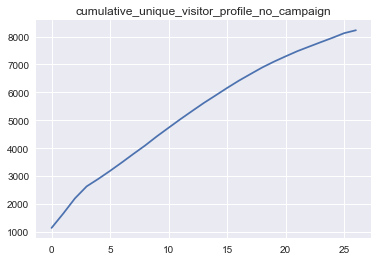

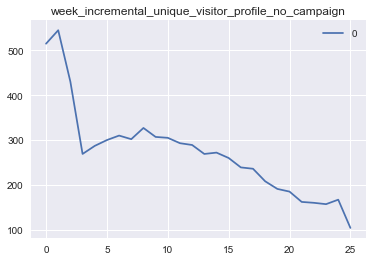

In [80]:
cumsum_uni_vistor_no_campaign = [] 
for c in monday_week:
    x = (len(df_final[(df_final['usage_monday_week']<= c) & (df_final['unique_identifier']=='no campaign')]['profile_id_df_user'].unique()))
    print(x)
    cumsum_uni_vistor_no_campaign.append(x)
    
df_delta = pd.DataFrame(cumsum_uni_vistor_no_campaign).diff().shift(-1)
    
plt.plot(cumsum_uni_vistor_no_campaign)
plt.title('cumulative_unique_visitor_profile_no_campaign')
df_delta.plot()
plt.title('week_incremental_unique_visitor_profile_no_campaign')




In [214]:
df_final['unique_identifier'].unique()

array(['no campaign', 'this was the first campaign_email_campaign0_A',
       'new headers and subject lines_email_campaign1_B',
       'new headers and subject lines_email_campaign1_C',
       'header and subject from segment B previous campaign_email_campaign2_B'],
      dtype=object)

In [230]:
'this was the first campaign_email_campaign0_A'

cumsum_uni_visitor_campaign_0 = [] 
for c in monday_week:
    x = (len(df_final[(df_final['usage_monday_week']<=c) & (df_final['unique_identifier']=='this was the first campaign_email_campaign0_A')]['profile_id_df_user'].unique()))
    print(x)
    cumsum_uni_visitor_campaign_0.append(x)

0
0
244
244
244
244
244
244
244
244
244
244
244
244
244
244
244
244
244
244
244
244
244
244
244
244
244


In [229]:
'new headers and subject lines_email_campaign1_B'

cumsum_uni_visitor_campaign_1B = [] 
for c in monday_week:
    x = (len(df_final[(df_final['usage_monday_week']<=c) & (df_final['unique_identifier']=='new headers and subject lines_email_campaign1_B')]['profile_id_df_user'].unique()))
    print(x)
    cumsum_uni_visitor_campaign_1B.append(x)

0
0
0
0
233
233
233
233
233
233
233
233
233
233
233
233
233
233
233
233
233
233
233
233
233
233
233


In [228]:
'new headers and subject lines_email_campaign1_C'

cumsum_uni_visitor_campaign_1C = [] 
for c in monday_week:
    x = (len(df_final[(df_final['usage_monday_week']<=c) & (df_final['unique_identifier']=='new headers and subject lines_email_campaign1_C')]['profile_id_df_user'].unique()))
    print(x)
    cumsum_uni_visitor_campaign_1C.append(x)

0
0
0
0
125
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160


In [225]:
'header and subject from segment B previous campaign_email_campaign2_B'

cumsum_uni_visitor_campaign_2_B = [] 
for c in monday_week:
    x = (len(df_final[(df_final['usage_monday_week']<=c) & (df_final['unique_identifier']=='header and subject from segment B previous campaign_email_campaign2_B')]['profile_id_df_user'].unique()))
    print(x)
    cumsum_uni_visitor_campaign_2_B.append(x)

0
0
0
0
0
0
350
350
350
350
350
350
350
350
350
350
350
350
350
350
350
350
350
350
350
350
350


Text(0.5,1,'Cumulative New Visitors By Week Per Campaign')

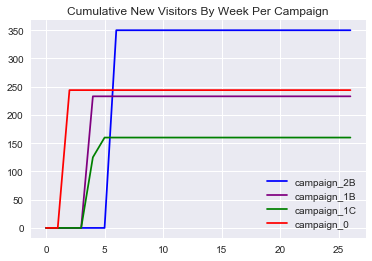

In [239]:
plt.plot(cumsum_uni_visitor_campaign_2_B, color="blue")
plt.plot(cumsum_uni_visitor_campaign_1B, color='purple')
plt.plot(cumsum_uni_visitor_campaign_1C,color='green')
plt.plot(cumsum_uni_visitor_campaign_0, color='red')
plt.legend(["campaign_2B", "campaign_1B", "campaign_1C", "campaign_0"])
plt.title("Cumulative New Visitors By Week Per Campaign")
#cumsum_uni_vistor_campaign_2_B

1139
1756
2545
2975
3602
3924
4574
4884
5186
5513
5820
6125
6418
6707
6976
7248
7508
7747
7983
8191
8382
8567
8729
8889
9046
9213
9317


Text(0.5,1,'cumulative_unique_visitor_profile_all')

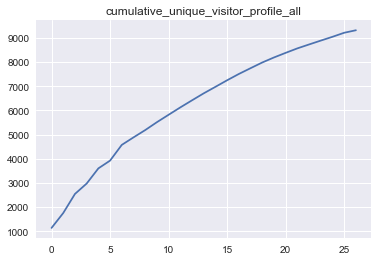

In [83]:
cumsum_uni_vistor_all = [] 
for c in monday_week:
    x = (len(df_final[(df_final['usage_monday_week']<= c)]['profile_id_df_user'].unique()))
    print(x)
    cumsum_uni_vistor_all.append(x)
    
#df_delta = pd.DataFrame(cumsum_uni_vistor_no_campaign).diff().shift(-1)
    
plt.plot(cumsum_uni_vistor_all)
plt.title('cumulative_unique_visitor_profile_all')
# df_delta.plot()
# plt.title('week_incremental_unique_visitor_profile_no_campaign')

In [70]:
len(df_final['profile_id_df_user'].unique())

9317

In [72]:
df_final.head(5)

,date_usage,day of week,usage_monday_week,profile_id_df_user,campaign_description,campaign_id,campaign_variation,day,profile_id,date_campaign,unique_identifier
0,2015-07-02,3,2015-06-29,cb0a2376cc2123b1,NaN,NaN,NaN,NaN,NaN,NaT,no campaign
1,2015-07-15,2,2015-07-13,9a162222b6369695,this was the first campaign,email_campaign0,A,2015-07-13 00:00:00,9a162222b6369695,2015-07-13,this was the first campaign_email_campaign0_A
2,2015-12-13,6,2015-12-07,b6a727b02599a307,this was the first campaign,email_campaign0,A,2015-07-13 00:00:00,b6a727b02599a307,2015-07-13,this was the first campaign_email_campaign0_A
3,2015-07-27,0,2015-07-27,6b949334c76a052b,new headers and subject lines,email_campaign1,B,2015-07-27 00:00:00,6b949334c76a052b,2015-07-27,new headers and subject lines_email_campaign1_B
4,2015-10-05,0,2015-10-05,4304392080cb06c2,new headers and subject lines,email_campaign1,B,2015-07-27 00:00:00,4304392080cb06c2,2015-07-27,new headers and subject lines_email_campaign1_B


In [79]:
df_final.groupby('usage_monday_week')['profile_id_df_user'].nunique()

usage_monday_week
2015-06-29    1139
2015-07-06    1193
2015-07-13    1462
2015-07-20    1121
2015-07-27    1245
2015-08-03    1020
2015-08-10    1189
2015-08-17    1007
2015-08-24    1010
2015-08-31    1043
2015-09-07    1034
2015-09-14    1039
2015-09-21     940
2015-09-28    1070
2015-10-05    1019
2015-10-12     888
2015-10-19    1069
2015-10-26     958
2015-11-02    1020
2015-11-09     960
2015-11-16     828
2015-11-23     867
2015-11-30     783
2015-12-07     816
2015-12-14     819
2015-12-21     952
2015-12-28     674
Name: profile_id_df_user, dtype: int64

In [78]:
df_final.groupby('usage_monday_week')['profile_id_df_user'].count()

usage_monday_week
2015-06-29    3485
2015-07-06    1514
2015-07-13    3528
2015-07-20    1311
2015-07-27    4042
2015-08-03    1174
2015-08-10    3470
2015-08-17    1318
2015-08-24    1352
2015-08-31    1519
2015-09-07    1435
2015-09-14    1379
2015-09-21    1248
2015-09-28    1428
2015-10-05    1426
2015-10-12    1232
2015-10-19    1501
2015-10-26    1272
2015-11-02    1461
2015-11-09    1226
2015-11-16    1168
2015-11-23    1191
2015-11-30    1101
2015-12-07    1247
2015-12-14    1139
2015-12-21    1357
2015-12-28     867
Name: profile_id_df_user, dtype: int64

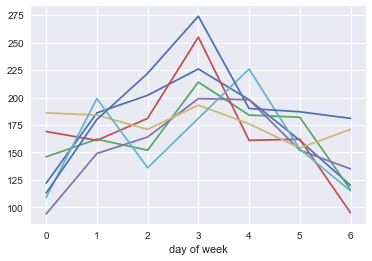

In [262]:
# exclude the impact of the campaigns
df_seasonality = df_final[df_final['date_usage']>='2015-09-01']
#df_seasonality.groupby('day of week')['profile_id_df_user'].nunique()
df_season = df_seasonality.pivot_table(index='usage_monday_week', columns='day of week', values='profile_id_df_user', aggfunc='count')
#df_season.columns = ['Mon','Tue','Wed','Thu','Fri','Sat','Sun']
df_season.iloc[10:-1,:].T.plot(legend=None)

In [258]:
df_season.iloc[10:-1,:].T

usage_monday_week,2015-11-09 00:00:00,2015-11-16 00:00:00,2015-11-23 00:00:00,2015-11-30 00:00:00,2015-12-07 00:00:00,2015-12-14 00:00:00,2015-12-21 00:00:00
Mon,122.0,146.0,169.0,94.0,186.0,109.0,113.0
Tue,186.0,162.0,161.0,149.0,184.0,199.0,180.0
Wed,202.0,152.0,181.0,164.0,171.0,136.0,222.0
Thu,226.0,214.0,255.0,199.0,193.0,181.0,274.0
Fri,198.0,184.0,161.0,198.0,176.0,226.0,190.0
Sat,161.0,182.0,162.0,152.0,154.0,153.0,187.0
Sun,120.0,116.0,95.0,135.0,171.0,115.0,181.0
